In [114]:
import os
from PIL import Image

# Directory path
folder_path = "/Users/tylerklimas/Desktop/FoodClassifier/data/pizza_steak_sushi/train/pizza"


image_paths = []
images = []
# Check if the directory exists
if os.path.exists(folder_path):
    # Get list of files in the directory
    files = os.listdir(folder_path)
    
    # Loop through each file
    for file in files:
        # Check if file is an image
        if file.endswith('.jpg') or file.endswith('.png'):  # Add more extensions if needed
            # Open the image
            image_path = os.path.join(folder_path, file)
            image_paths.append(image_path)
            image = Image.open(image_path)
            images.append(image)

else:
    print("Directory not found!")

In [115]:
from torch.utils.data import DataLoader
from torchvision import transforms



transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
]
)
dataset = [(transform(image),) for image in images]



train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [116]:
from transformers import AutoImageProcessor, ViTForImageClassification
import torch
from datasets import load_dataset

# dataset = load_dataset("huggingface/cats-image")
# image_path = image_paths[1]



# dataset = load_dataset("huggingface/cats-image")
# cat_image = dataset["test"]["image"][0]
# print(cat_image)

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224")


# for data in train_loader:
#     inputs = image_processor(data, return_tensors="pt")

#     with torch.no_grad():
#         logits = model(**inputs).logits

#     # model predicts one of the 1000 ImageNet classes
#     predicted_label = logits.argmax(-1).item()
#     print(model.config.id2label[predicted_label])

for image in image_paths:
    imageOpen = Image.open(image)
    inputs = image_processor(imageOpen, return_tensors="pt")

    with torch.no_grad():
        logits = model(**inputs).logits

    # model predicts one of the 1000 ImageNet classes
    predicted_label = logits.argmax(-1).item()
    print(model.config.id2label[predicted_label])



pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
pizza, pizza pie
frying pan, frypan, skillet


KeyboardInterrupt: 

In [117]:
ds = load_dataset('beans')  #dataset of healthy vs unhealthy bean leaves
ex = ds['train'][400]
im = ex['image']

bean_rust


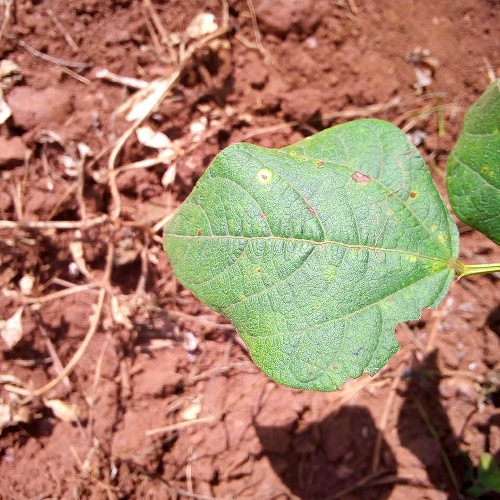

In [118]:
labels = ds['train'].features['labels']

im_label = labels.int2str(ex['labels']) 
print(im_label)
im

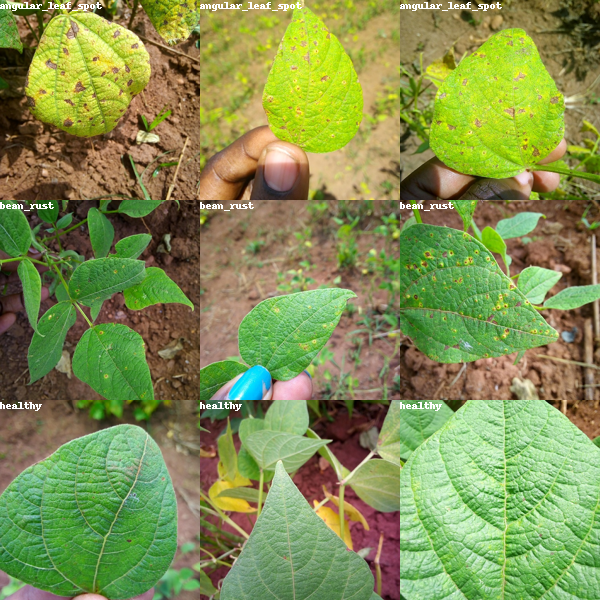

In [44]:
import random
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(200, 200)):

    w, h = size
    labels = ds['train'].features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)
#     font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf", 24)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['labels'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255))

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [64]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processsor = ViTImageProcessor.from_pretrained(model_name_or_path)  # returns (1, 3, 224, 224) 


In [65]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['labels'] = example['labels']
    return inputs

out = process_example(ex)  # you could call ds.map with this function but itd be slow
labels.int2str(out.labels)

'bean_rust'

In [66]:
ds = load_dataset('beans')
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [67]:
def transform_batch(example):
    
    inputs = processsor([image for image in example['image']], return_tensors='pt')
    
    inputs['labels'] = example['labels']
    
    return inputs

In [83]:
prepared_ds = ds.with_transform(transform_batch)
# now whenever i use the dataset, it will be transformed in real time
ex1 = prepared_ds['train'][0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


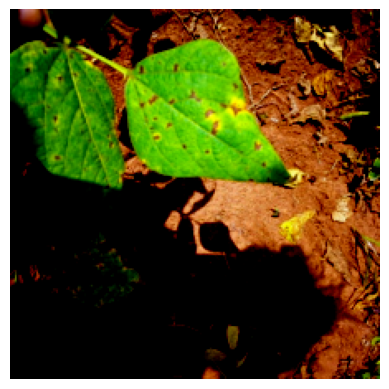

angular_leaf_spot


In [96]:
import numpy as np
import matplotlib.pyplot as plt

ex0 = ds['train'][0:2]  # og dataset

labels.int2str(ex1['labels'])


# img = ex1['image']
# Image.show(img)
img = ex1['pixel_values']

image_np = np.transpose(img, (1, 2, 0))

plt.imshow(image_np)
plt.axis('off')  # Optional: to not show axis values
plt.show()
print(labels.int2str(ex1['labels']))

In [97]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [98]:
from transformers import ViTForImageClassification


model_name_or_path = 'google/vit-base-patch16-224-in21k'

labels = ds['train'].features['labels'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [107]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy",  trust_remote_code=True)
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

In [110]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-beans",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  fp16=False,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
#   report_to='tensorboard',
  load_best_model_at_end=True,
)


In [111]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=processor,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

In [113]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  eval_accuracy = 0.8797
  eval_loss     = 0.7296
